## Image Thresholding
***

O Image Thresholding é uma das técnicas de segmentação mais comuns (e básicas) na visão  computacional  e  nos  permite  separar  o  primeiro  plano  (ou  seja,  os  objetos  que  nos interessam) do fundo da imagem.

O limiar (ou Image Thresholding) é usado para criar uma imagem binária apartir de uma imagem em escala de cinza. É a maneira mais simples de segmentar objetos de um plano de fundo. Os algoritmos de limiar implementados em scikit-image podem ser separados em duas categorias.

* **Baseado em histograma**: O  histograma  da  intensidade dos  pixels  é  usado  e  determinadas premissas são feitas nas propriedades desse histograma (por exemplo, bimodal).


* **Local**: Para processar um pixel, apenas os pixels vizinhos são usados. Esses algoritmos muitas vezes exigem mais tempo de computação.

Se você não está familiarizado com os detalhes dos diferentes algoritmos, muitas vezes é difícil saber qual algoritmo dará os melhores resultados. Para ajudá-lo, o Scikit-image inclui uma  função  para  avaliar  algoritmos  de  limiar  fornecidos  pela  biblioteca. Dessa forma, você pode selecionar o melhor algoritmo para seus dados sem uma compreensão profunda de seus mecanismos.

O limiar no processamento de imagem significa atualizar o valor de cor de um pixel para branco ou preto de acordo com um valor de limiar. Se o valor de pixel for maior do que o valor de limiar, definimos o pixel como WHITE, se não, configuramos para BLACK. Existem também variações no limiar. Usando o conceito de obter valores de pixel e definir valores de pixels, é bastante simples escrever um código para o limiar de imagem.

O  limiar  de  imagem funciona  bem  em  casos  simples  em  que  o  fundo  da  imagem  é uniforme. Mas pode haver cenários quando o fundo da imagem não é uniforme e isso acontece com mais frequência. Para efetivamente limitar a imagem, ao invés de usar um valor de limite global,  calculamos  valores  de  limiar  diferentes  para  diferentes  partes  da  imagem.  Isso  é conhecido como thresholding adaptativo. Como o nome sugere, adaptamos o valor de limiar de acordo com diferentes partes da imagem.

O limiar vem em muitas formas. Temos um limite simples onde fornecemos parâmetros manualmente  para segmentar  a  imagem, isso  funciona  muito  bem  em  condições  de iluminação controlada, onde podemos garantir um alto contraste entre o primeiro plano e o plano de fundo da imagem.

Nós  também  temos  métodos  como  o  limiar  de  Otsu  que  tenta  ser  mais  dinâmico  e computar automaticamente o valor de limiar ideal com base na imagem de entrada.

E  existe  ainda  o limite  adaptativo  que,  ao  invés  de  tentar  limpar  uma  imagem globalmente usando um único valor, quebra a imagem para baixo em pedaços menores e limita cada uma dessas peças separadamente e individualmente.

***

In [1]:
from matplotlib import pyplot as plt
import cv2

def show(img, color=True):
    """
    Redimensionar a imagem e mostrar no codigo.
    """

    if color:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.rcParams['figure.figsize'] = (50, 50)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [2]:
# Carrega a imagem e converte para Grayscale
image = cv2.imread("imagens/casa.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

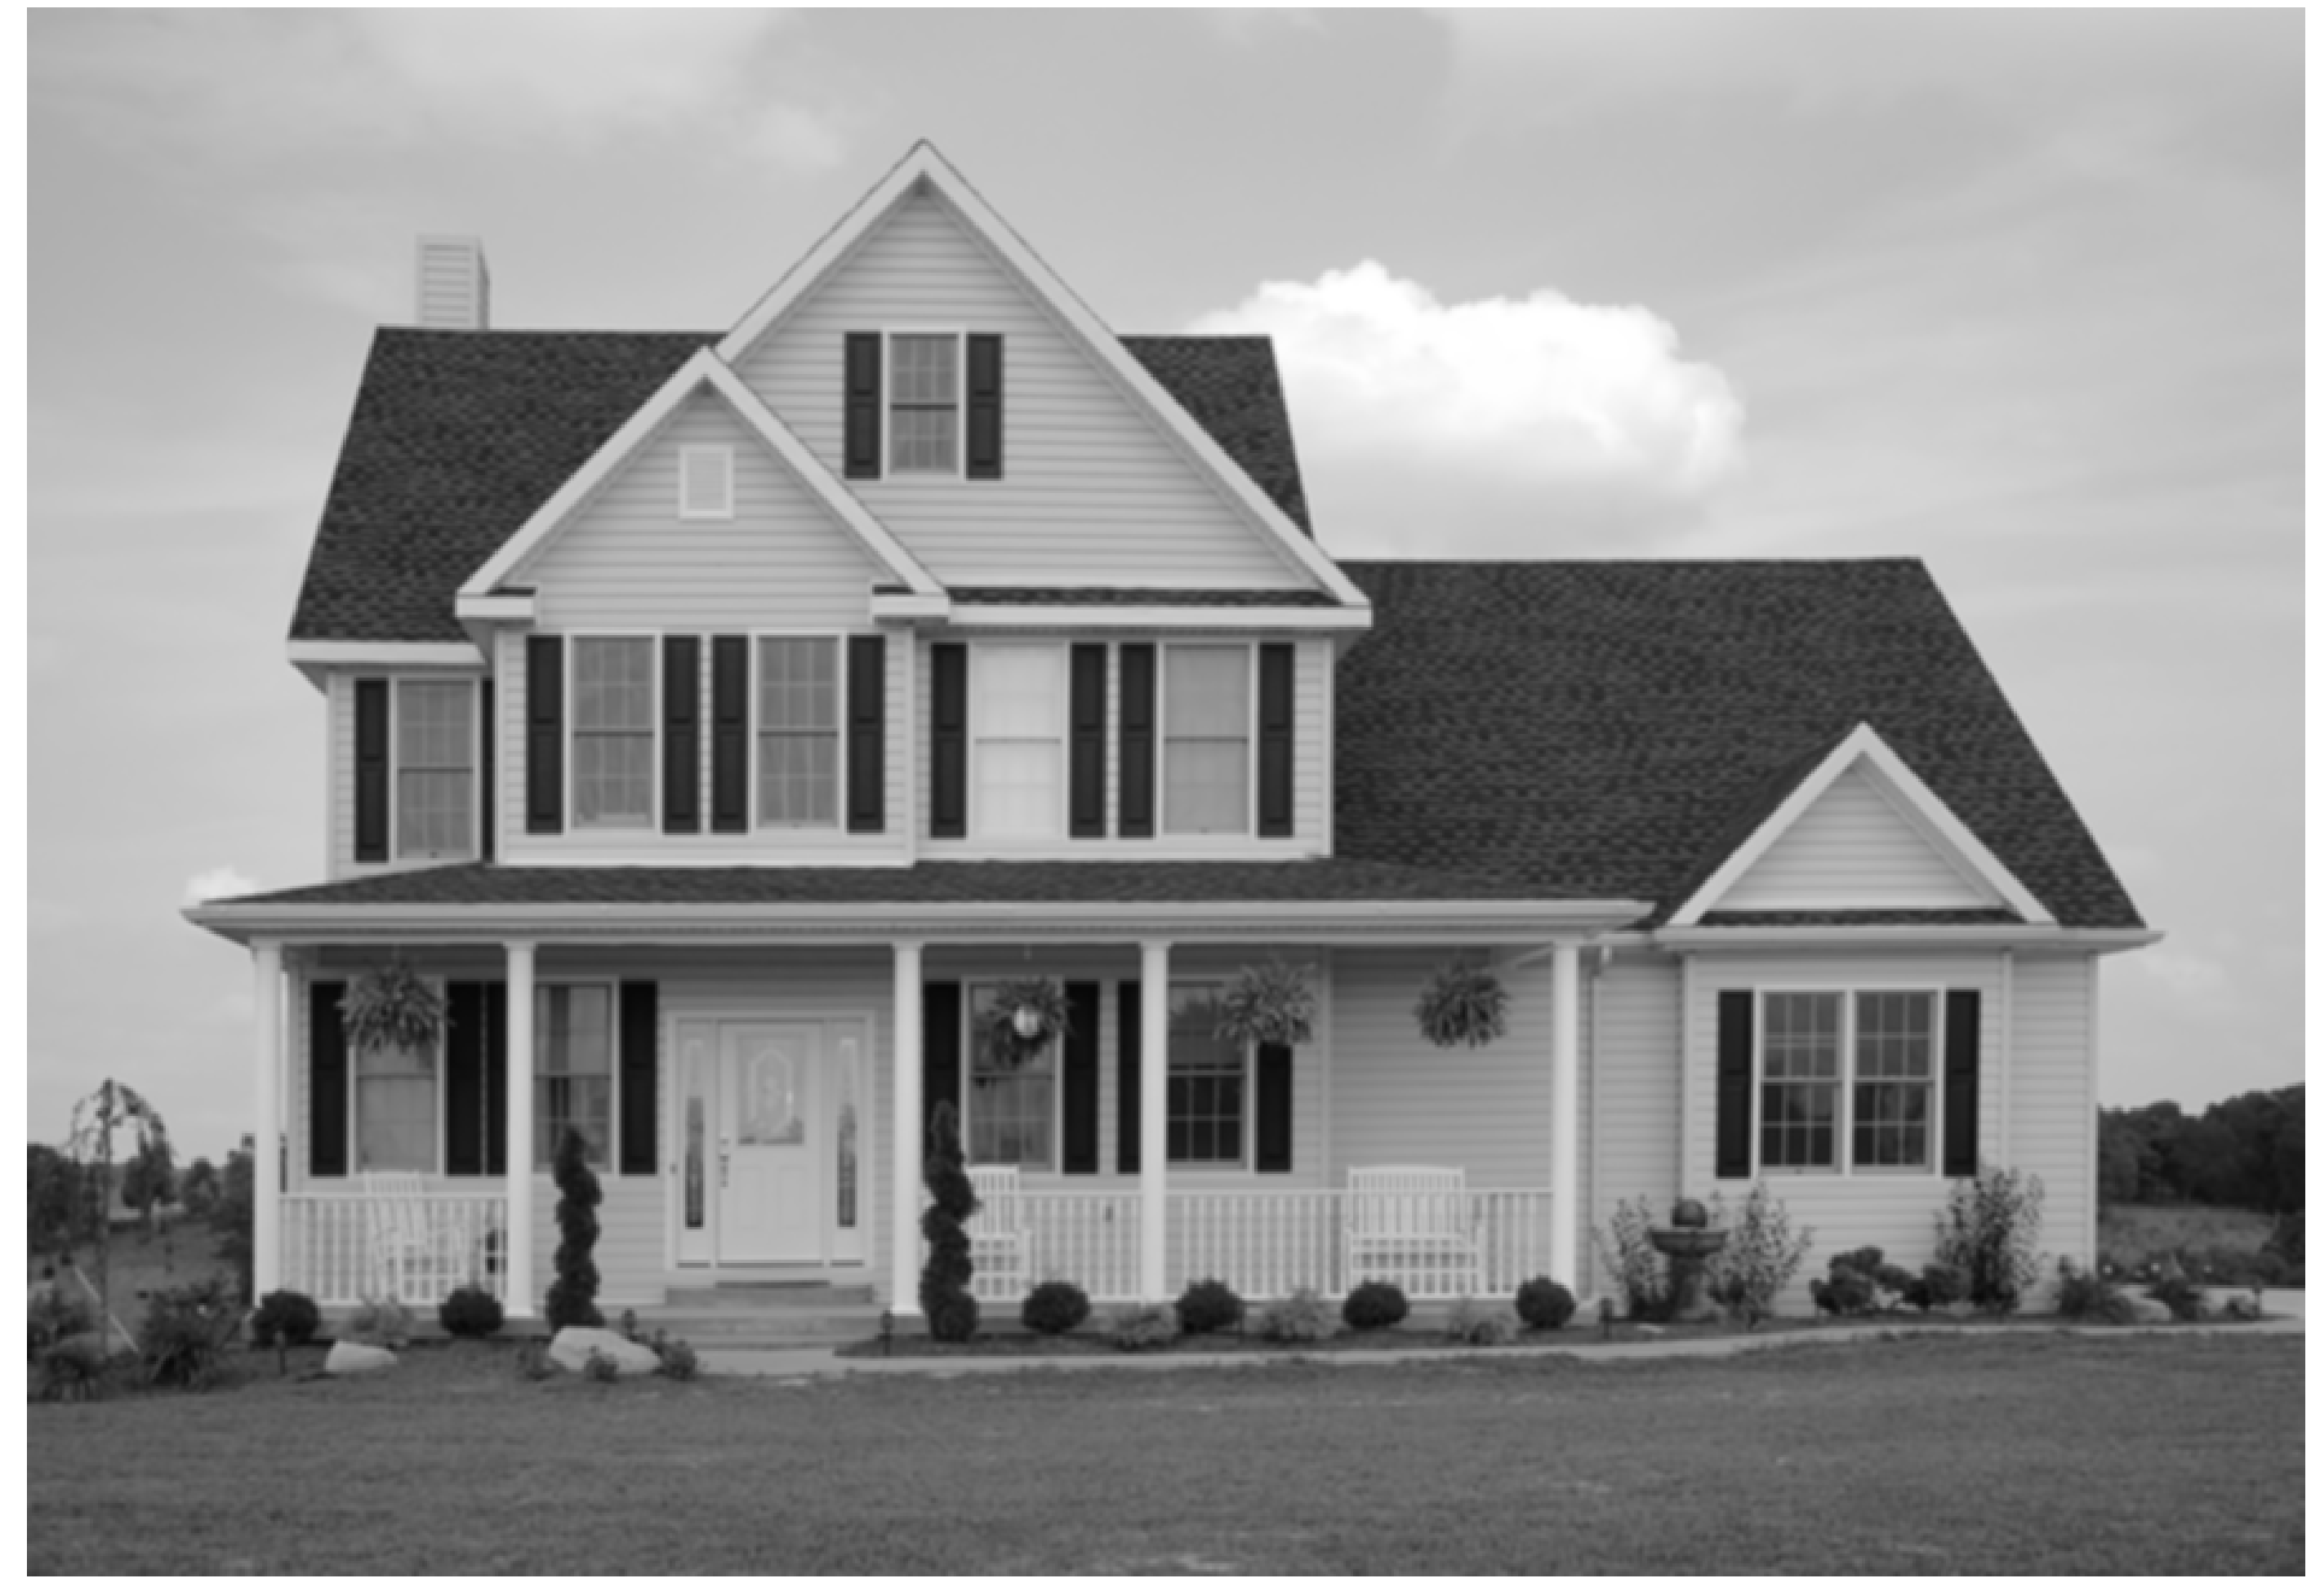

In [3]:
# Aplica o filtro gaussiano
# A aplicação do filtro gaussiano ajuda a remover algumas das bordas de alta frequência da imagem 
# que não nos preocupam e nos permitem obter uma segmentação mais "limpa".
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
show(blurred)

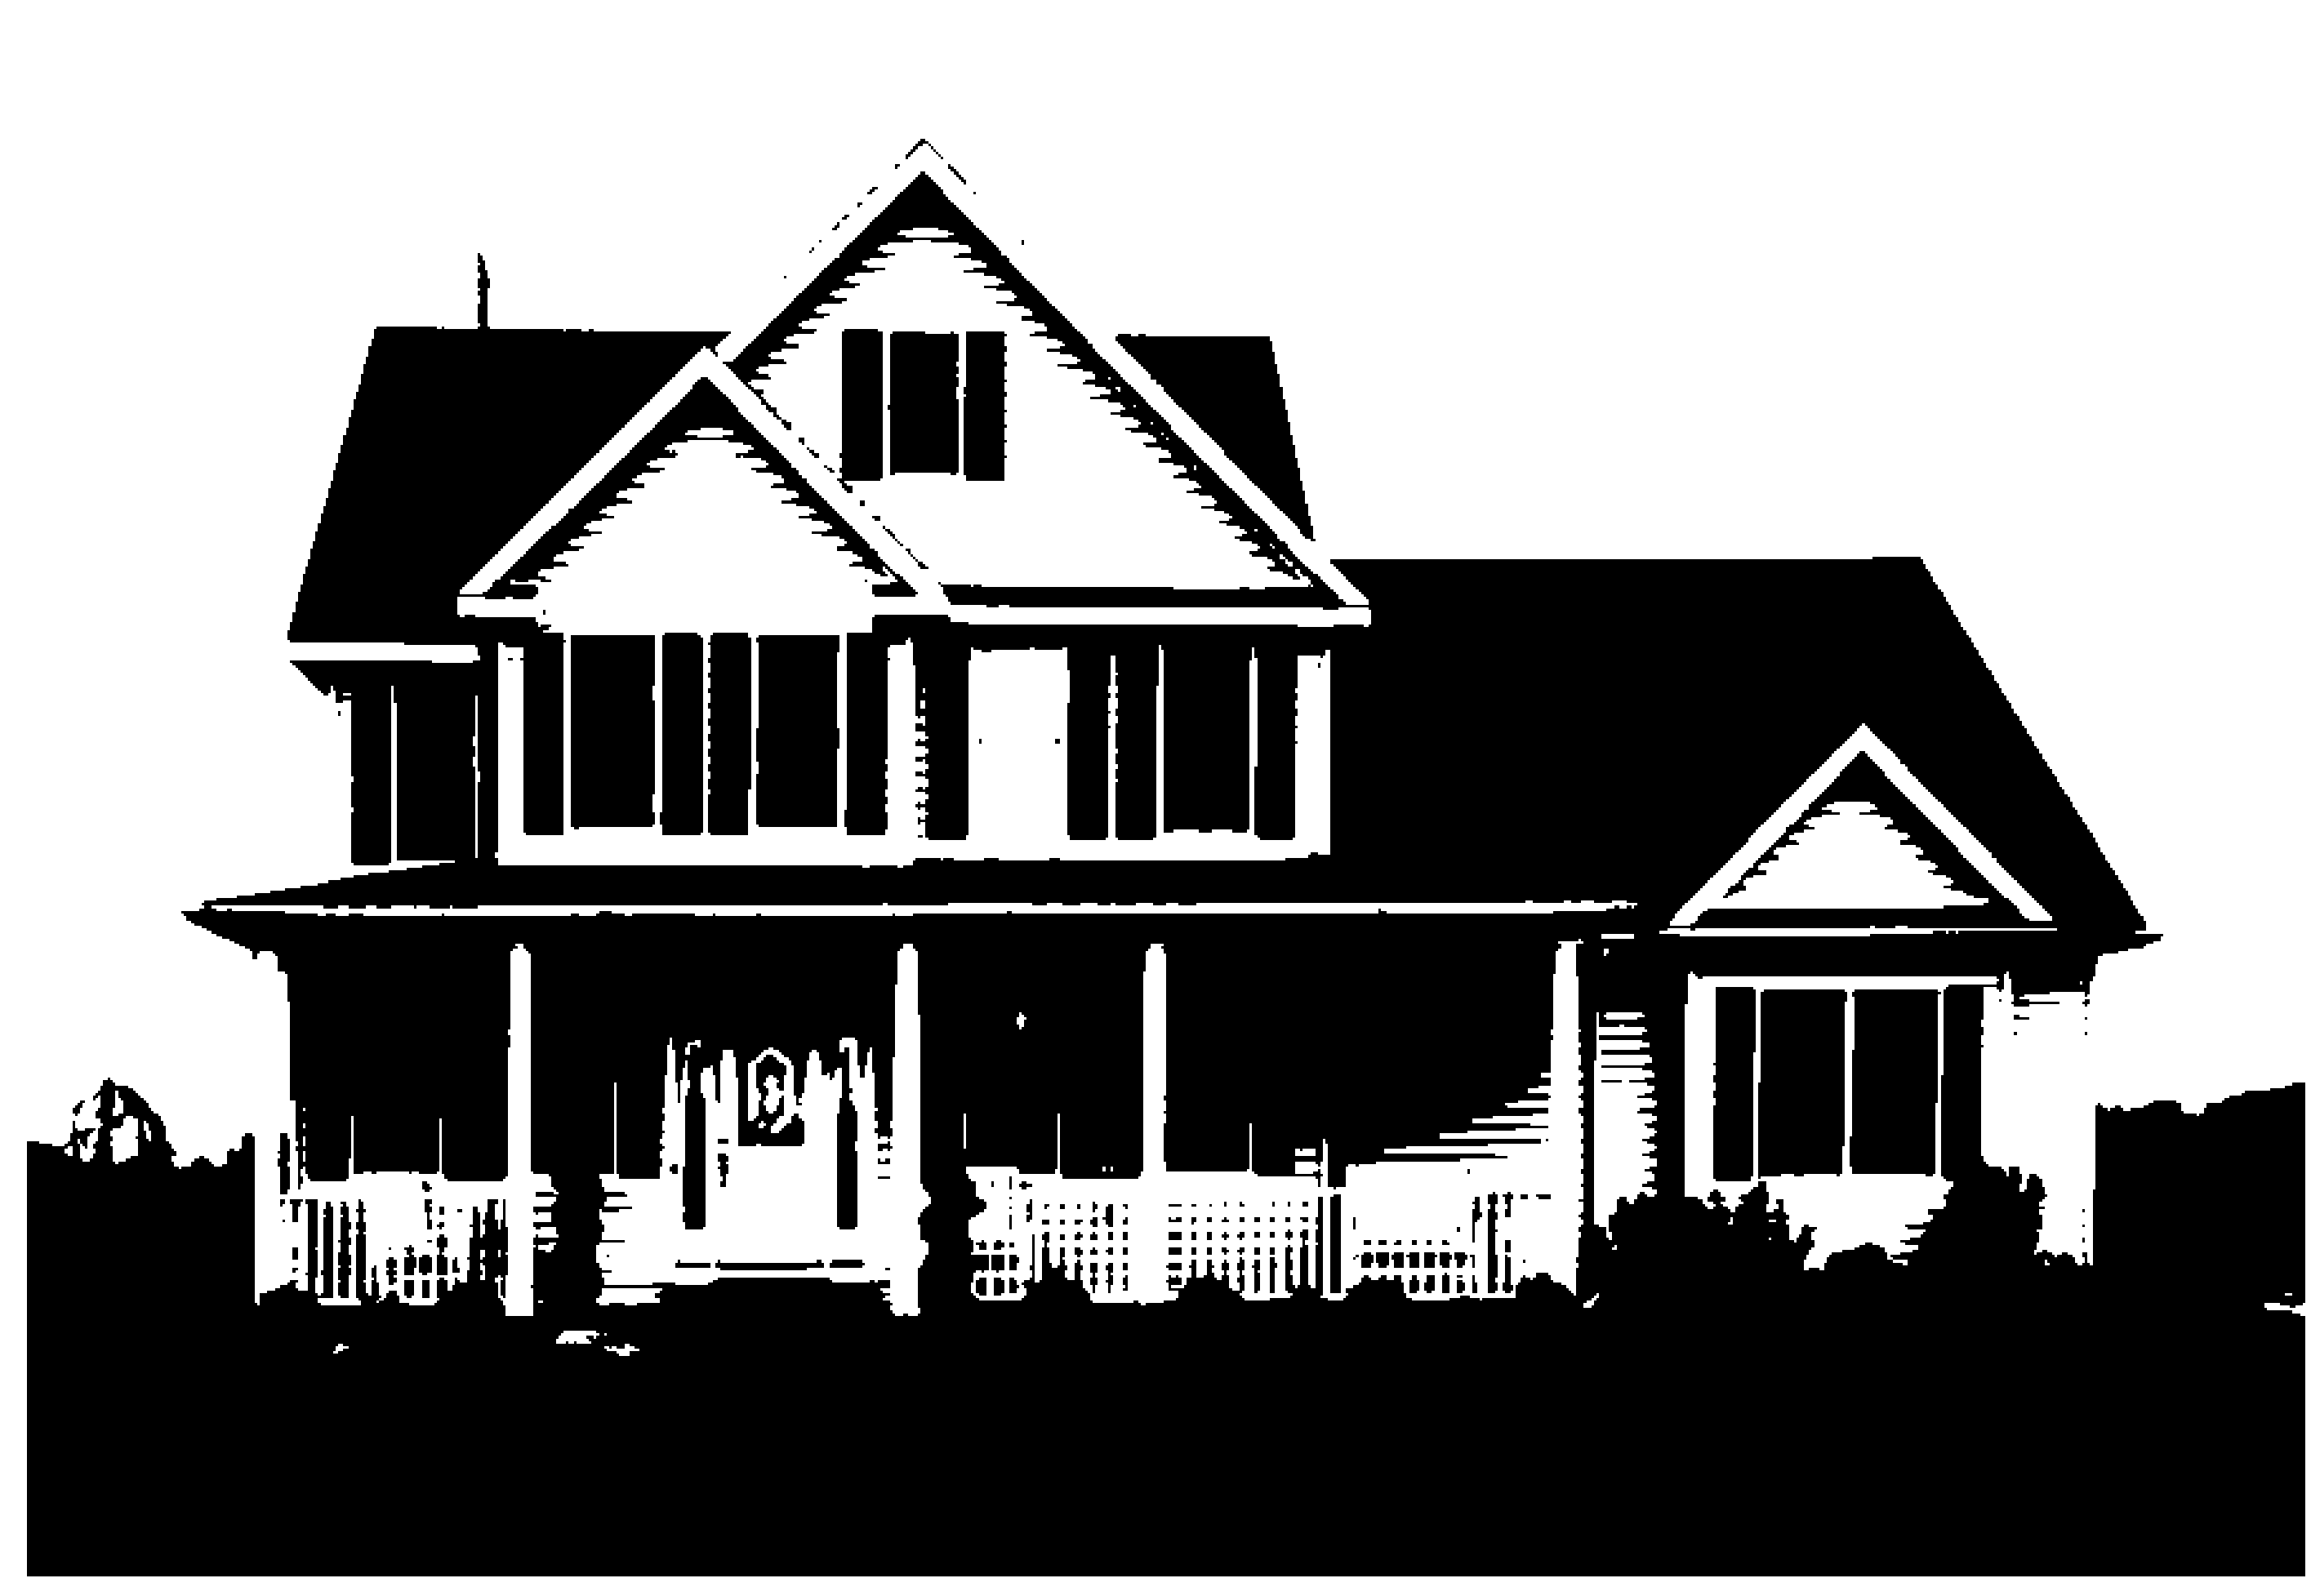

In [4]:
# Image thresholding com limite 155. (PRETO)
(T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)
show(thresh)

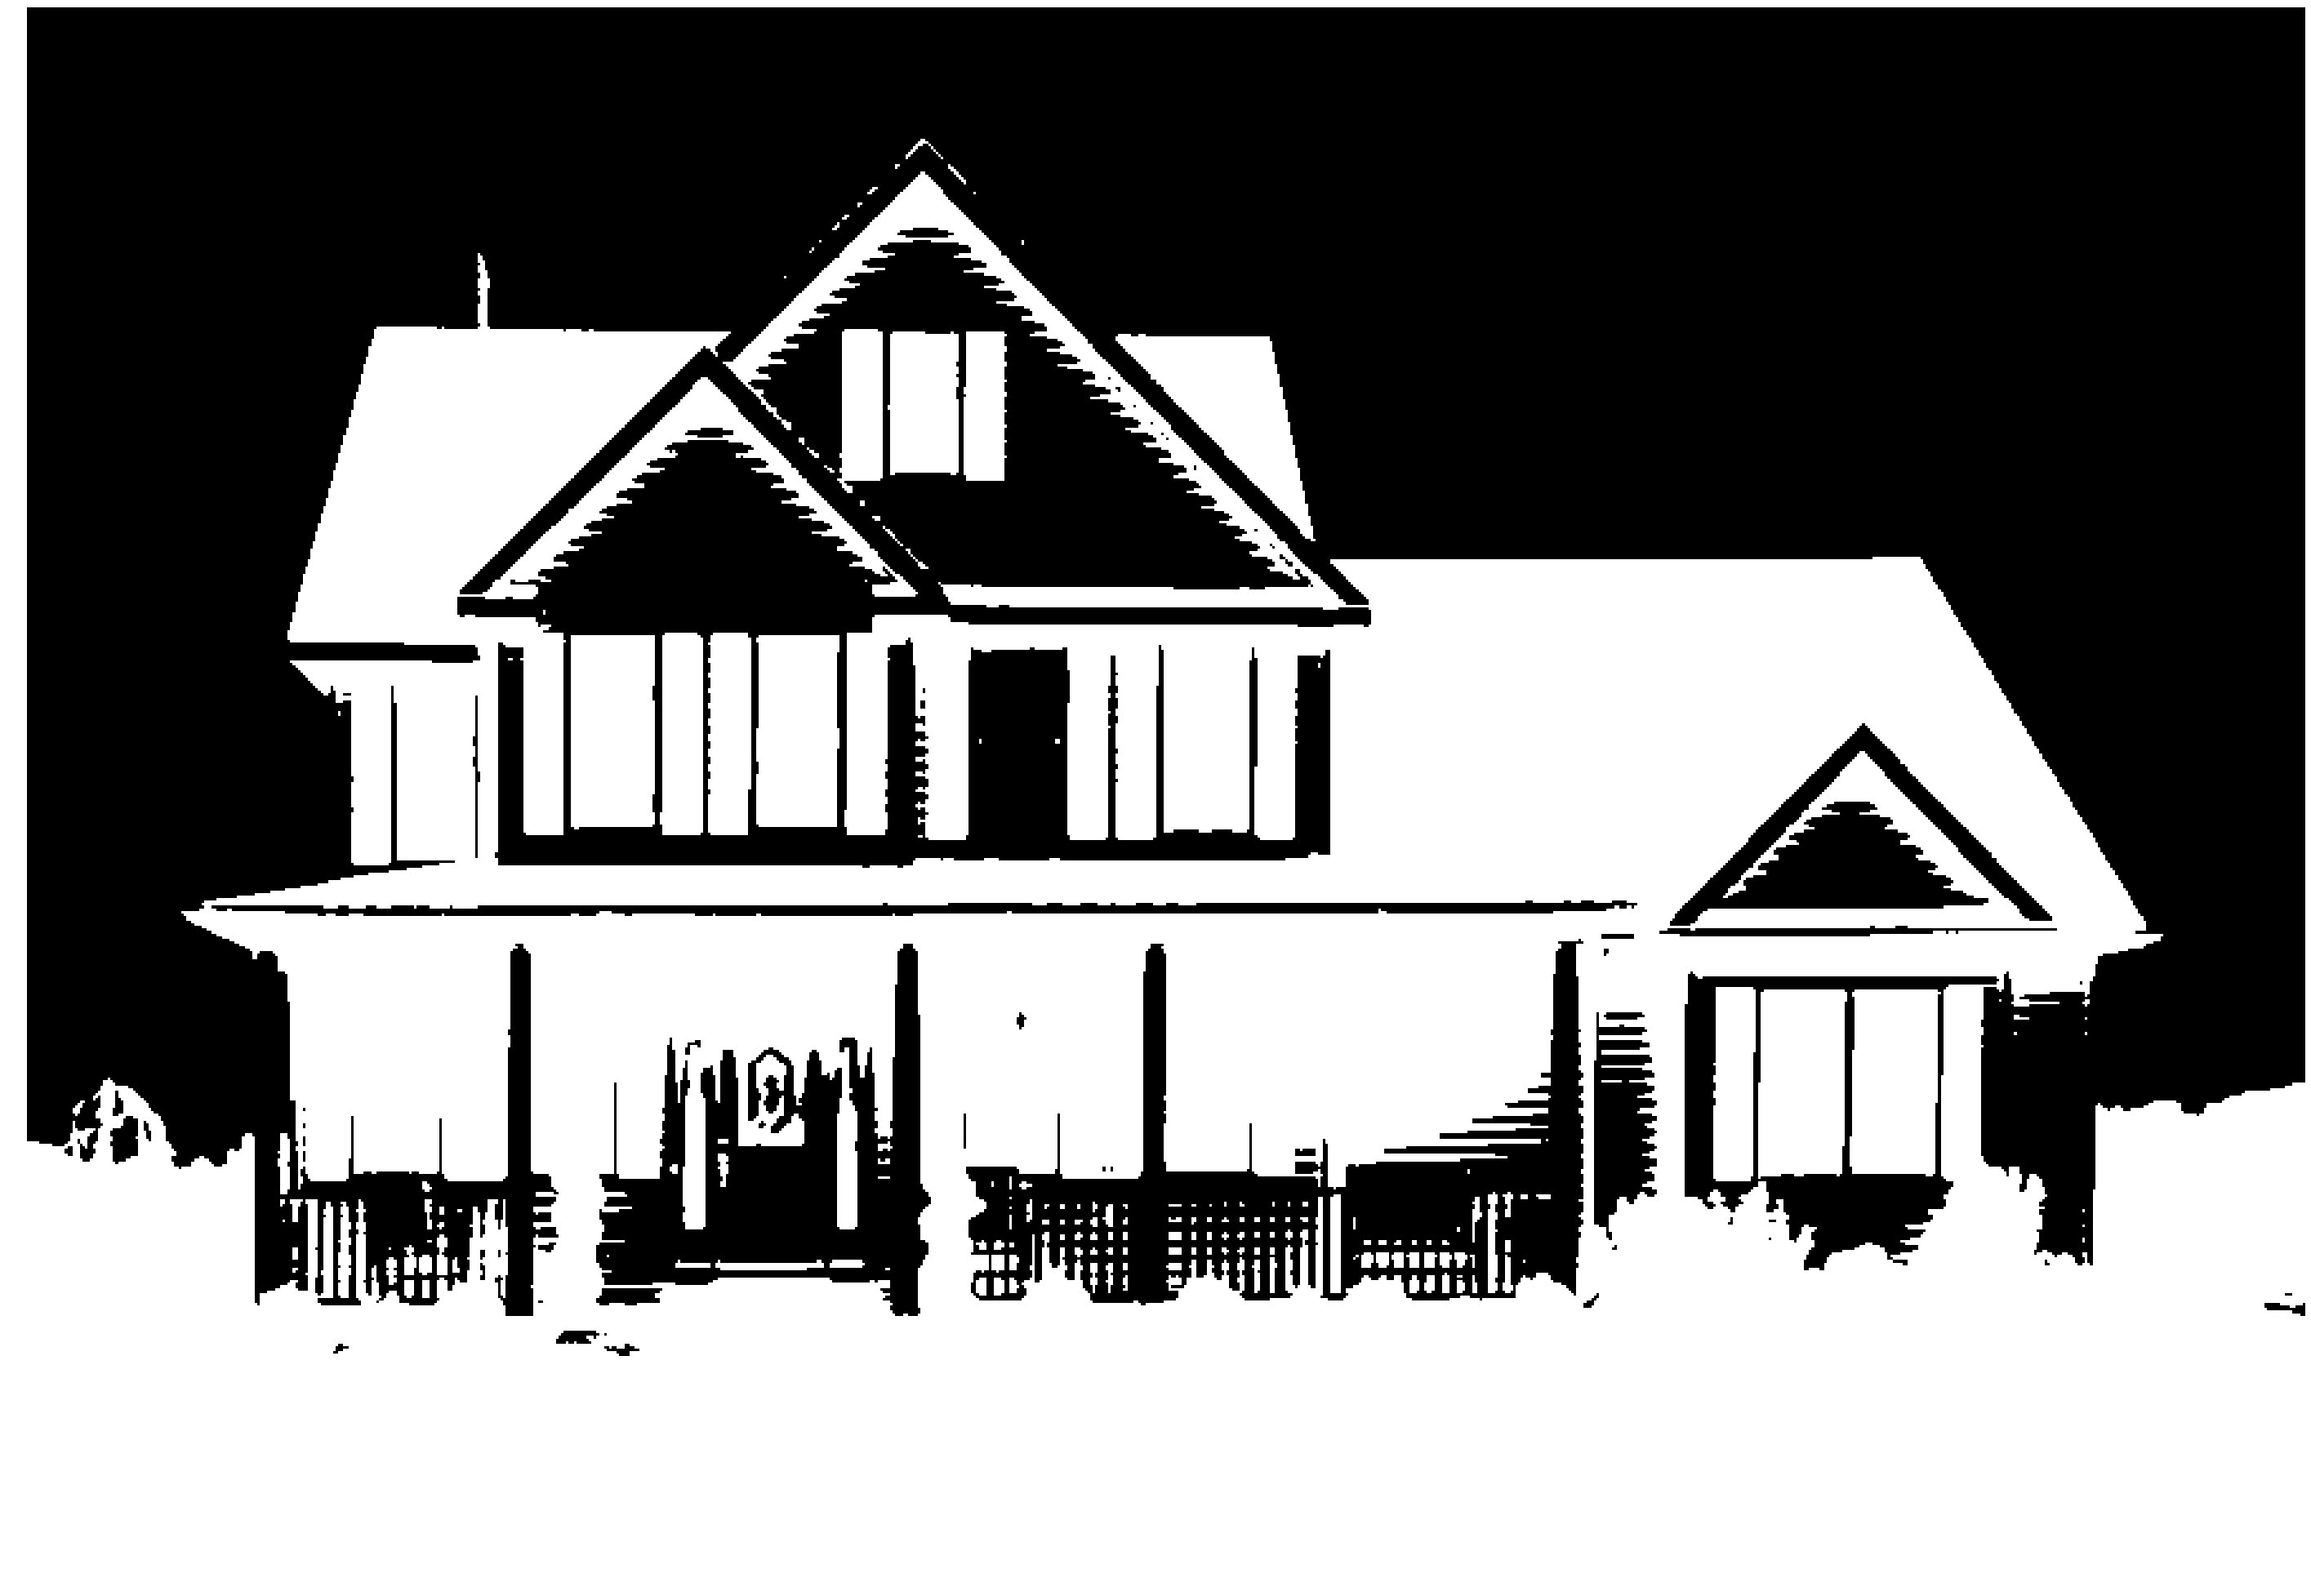

In [5]:
# Vamos aplicar o limiar básico. O primeiro parâmetro é a
# imagem, o segundo valor é o nosso limiar.
# Se um valor de pixel for maior que o nosso limite (neste
# caso, 155), convertemos para BRANCO, caso contrário, PRETO. (BRANCO)
(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)
show(threshInv)